In [1]:
import numpy as np

In [2]:
arr = np.arange(11)

In [3]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [1]:
import pandas as pd # to load and manipulate data and for one-hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw the graphs
from sklearn.tree import DecisionTreeClassifier # to buid a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.metrics import confusion_matrix # to create a confusion matrix
#from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

In [2]:
import sklearn
print(sklearn.__version__)


1.5.2


In [3]:
pip show scikit-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [4]:
import numpy as np

In [5]:
pwd

'C:\\Users\\HP\\ENGR.TOM\\Engr. Tom'

In [6]:
pwd

'C:\\Users\\HP\\ENGR.TOM\\Engr. Tom'

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [10]:
# print the first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
## change the column numbers to column names
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeack',
              'slope',
              'ca',
              'thal',
              'hd']

              

In [12]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
# identifying the missing data
# dtypes tell us the ' data type' for the each column

In [14]:
df.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeack    float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [15]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [16]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [17]:
# missing value 2 : dealing with missing data 

In [18]:
# count the num of row with missing values
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])
  

6

In [19]:
# let look at them
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:
# num of the row 
len(df)

303

since 6 of the 303 represent : 2% of the data so we remove the row

In [21]:
# we remove the rows with missing values
df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [22]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [23]:
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [24]:
len(df_no_missing)

297

In [25]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [26]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

using copy() ensures that the original data df_no_missing is not modified when we modify X or y

In [27]:
###format the data part1

using copy() ensures that the original data df_no_missing is not modified when we modify X or y



In [28]:
X = df_no_missing.drop('hd',axis=1).copy() 
# other ways
# X = df.no_missing.iloc[:,:-1]

In [29]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [30]:
## Make a new copy of the column of data we want to predict
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

format the data part 2: one-hot encoding
*age,float
*sex- category
0 = female
1 = male
* cp,chest pain, Category
1 = typical angina
2 = atypical angina
3 = non-anginal pain
4 = asymptomatic
* restbp, resting blood pressure(in mm Hg), float
* chol, serum cholesterol in mg/dl, float
*fbs, fasting blood sugar, category
0 = >=120mg/dl
1 = <120mg/dl
*restecg, resting electrocardiographic results, category
1 = normal
2 = having ST-T wave abnormality
3 = showing probable or definite left ventricular hypertrophy
* thalach, maximum heart rate achieved, float
*exang, exercise induced angina, Category
0 = no
1 = yes
*oldpeak, ST depression induced by exercise relative to rest. float
* slope, the slope of the peak exercise ST segiment, Category
1 = upsloping
2 = flat
3 = downsloping
* ca, number of major vessels(0-3) colored by fluoroscopy, float
* thal, thalium heart scan, category
3 = normal(no cold spots)
6 = fixed defect(cold spots during rest and exercise)
7 = reversible defect(when colds spots only appear during exercise)

In [31]:
X.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeack    float64
slope       float64
ca           object
thal         object
dtype: object

In [32]:
X['cp'].nunique()

4

In [33]:
X['cp'].unique()

array([1., 4., 3., 2.])

there are different ways to do one-Hot encoding in python. Two of the more popular methods are
ColumnTransformer()(from scikit-learn) and get_dummies() from pandas. ColumnTransformer() has a cool features
features where it creates a persistent function that can validate data that you get in the future
but it turn your data into an array and looses all of the column names while get_dummies() leaves
your data in a dataframe and retains the column names, making it easier to verify.

In [34]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [35]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])


In [36]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeack,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [37]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [38]:
# to resolve this problem
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 # set each non-zero value in y to 1
y.unique()              # verify that y only contains 0 and 1

array([0, 1], dtype=int64)

In [39]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

In [40]:
# build a preliminary classification tree

In [41]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)


# Create a decision tree classifier and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4525862068965517, 0.9166666666666667, 'True  '),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeack <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD

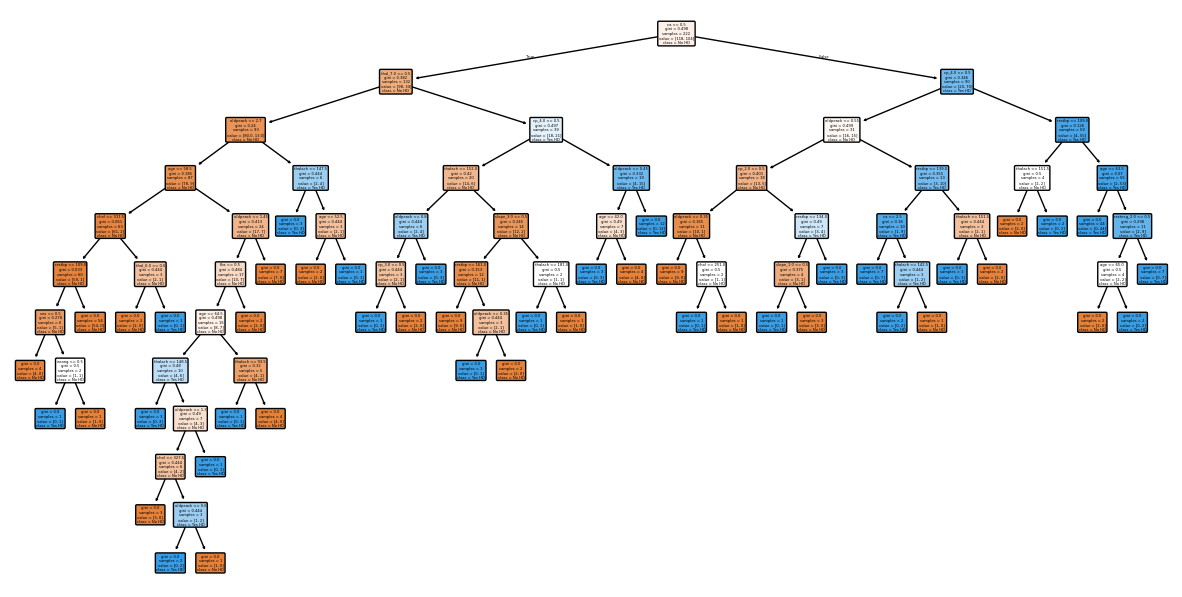

In [42]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['No HD','Yes HD'],
          feature_names=X_encoded.columns)

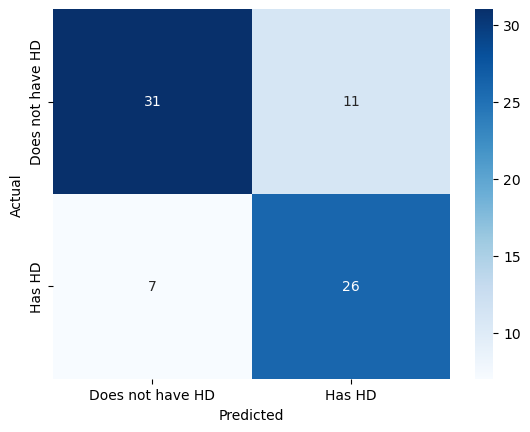

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))

# Plot using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Does not have HD', 'Has HD'], yticklabels=['Does not have HD', 'Has HD'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [44]:
from sklearn.metrics import classification_report

In [45]:
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels for the test set
print(classification_report(y_test, clf_dt.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [46]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that will put decision tree into

## now create one decision tree per values for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

ValueError: x and y must have same first dimension, but have shapes (1,) and (26,)

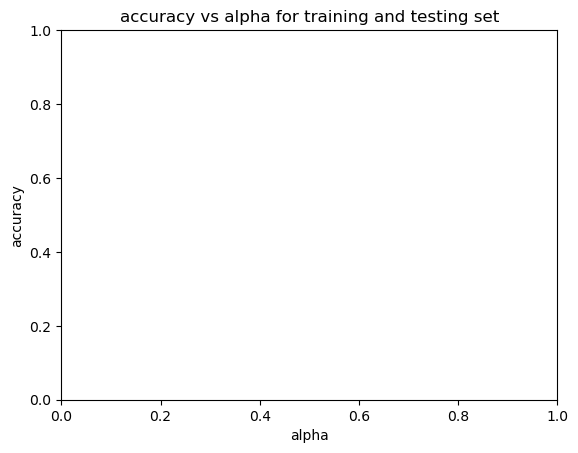

In [47]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]


fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing set')
ax.plot(ccp_alpha, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alpha,test_scores, marker='o', label ='test' ,drawstyle='steps-post')
ax.legend()
plt.show()



In [87]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

In [53]:
# Assuming you have a valid ccp_alpha array from the cost-complexity pruning process
# and clf_dts is a list of models trained with different ccp_alpha values

train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

# Ensure ccp_alpha has the same length as clf_dts, train_scores, and test_scores
if len(ccp_alpha) != len(train_scores):
    print("Adjusting ccp_alpha length to match train_scores and test_scores.")
    ccp_alpha = ccp_alpha[:len(train_scores)]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs. Alpha for Training and Testing Set')
ax.plot(ccp_alpha, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alpha, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()


TypeError: object of type 'numpy.float64' has no len()